#### import necessary packages

In [119]:
from pyDRTtools.runs import simple_run, EIS_object,Bayesian_run,peak_analysis
from pyDRTtools.GUI import Figure_Canvas
from pyDRTtools import basics, HMC, BHT,GUI
from math import sqrt, log
import numpy as np
from numpy.linalg import norm
from numpy import inf, sin, cos, cosh, pi, exp, log10
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [120]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

##### load EIS data

In [121]:
data = pd.read_csv('data_1.csv')

In [122]:
data

,Freqs,Real,Imag
0,999.040405,0.109963,0.003570
1,891.425842,0.110050,0.002942
2,794.237671,0.110220,0.002333
3,707.509460,0.110345,0.001810
4,631.009521,0.110476,0.001296
...,...,...,...
102,0.007927,0.140317,-0.017511
103,0.007064,0.141505,-0.018628
104,0.006296,0.142820,-0.019765
105,0.005612,0.143889,-0.020531


In [123]:
### Extract impedance components

In [124]:
Zexp = data['Real'].values + 1j*data['Imag'].values
freq_vec = data['Freqs'].values

In [125]:
Z_prime = np.real(Zexp)
Z_double_prime = np.imag(Zexp)
freq = freq_vec

#### create the instance of EIS_object

In [126]:
# Create an instance of EIS_object or load your data
eis_data = EIS_object(freq, Z_prime, Z_double_prime)

#### analyze EIS spectrum with simple run

In [127]:
# Call the simple_run function
entry = simple_run(eis_data)

C:\Users\user\anaconda3\envs\MYDRT\lib\site-packages\pyDRTtools\basics.py:59: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  out_val = integrate.quad(integrand_g_i, -50, 50, epsabs=1E-9, epsrel=1E-9)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.9585996637284167e-08
            Iterations: 1
            Function evaluations: 2
            Gradient evaluations: 1
GCV
                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) Oct 23 05:29:31 AM: Your problem has 109 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 23 05:29:31 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 23 05:29:31 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 23 05:29:31 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Oct 23 05:29:31 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                

#### Extract the gamma and tau_vec

In [128]:
# Set the results in your EIS_object instance
out_tau_vec = entry.out_tau_vec
gamma = entry.gamma
eis_data.out_tau_vec = out_tau_vec
eis_data.gamma = gamma

#### show results

In [129]:
# Set the results in your EIS_object instance
entry.out_tau_vec = out_tau_vec
entry.gamma = gamma
entry.method = "simple"
# Call the DRT_data method with 'simple' mode on the figure_canvas
# figure_canvas.DRT_data(entry)

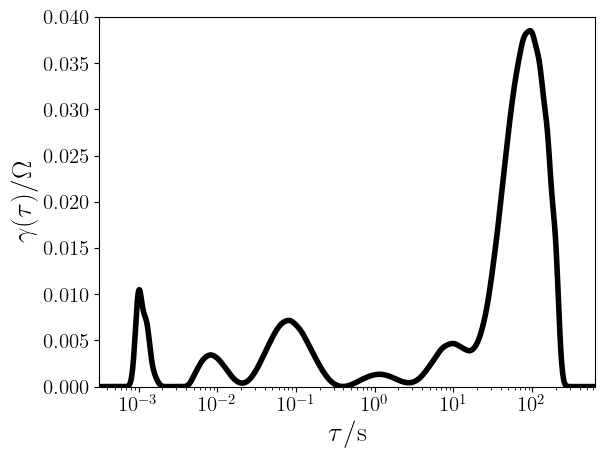

In [130]:
print(plt.semilogx(out_tau_vec, gamma, linewidth = 4, color = 'black'))
plt.xlim(out_tau_vec.min(), out_tau_vec.max())
plt.ylim(0,0.04)
plt.ylabel(r'$\gamma(\tau)/\Omega$', fontsize = 20)
plt.xlabel(r'$\tau/\rm s$', fontsize = 20)
plt.show()

#### Bayesian run

In [131]:
# Call the simple_run function
entry = Bayesian_run(eis_data)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.9585996637284167e-08
            Iterations: 1
            Function evaluations: 2
            Gradient evaluations: 1
GCV
                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) Oct 23 05:29:33 AM: Your problem has 109 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 23 05:29:33 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 23 05:29:33 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 23 05:29:33 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Oct 23 05:29:33 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                

#### extract DRT together with credible bands

##### plot results

In [132]:
out_tau_vec = entry.out_tau_vec
gamma = entry.gamma
upper_bnd = entry.upper_bound
lower_bnd = entry.lower_bound
mean = entry.mean
eis_data.out_tau_vec = out_tau_vec
eis_data.gamma = gamma

#### show result

In [ ]:
plt.fill_between(out_tau_vec, lower_bnd, upper_bnd,  facecolor='lightgrey')
plt.semilogx(out_tau_vec, gamma, color='black', label='MAP', linewidth=3)
plt.semilogx(out_tau_vec, mean, color='blue', label='mean', linewidth=3)
plt.semilogx(out_tau_vec, lower_bnd, color='black')
plt.semilogx(out_tau_vec,upper_bnd, color='black')
plt.legend(frameon = False, fontsize = 15)
plt.ylim(0,0.08)
plt.ylabel(r'$\gamma(\tau)/\Omega$', fontsize = 20)
plt.xlabel(r'$\tau/\rm s$', fontsize = 20)
plt.show()